In [1]:
# Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [13]:
# Initial imports
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

# Part 1:  Prepare the data

In [3]:
# Loading data
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)

#Preview the DatFrame
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [8]:
# Remove Myopic column from dataset
labels = df_myopia["MYOPIC"]
df_myopia_clean = df_myopia.drop("MYOPIC", axis=1)
df_myopia_clean.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [20]:
# Scale the data: Name the resulting DataFrame X
scaler = StandardScaler()
X = scaler.fit_transform(df_myopia_clean)
X.shape

(618, 16)

# Part 2: Apply Dimensional Reduction

In [19]:
# perfrom demensional reduction using PCA

# Initialize PCA model
pca = PCA(n_components=.9)
myopia_pca = pca.fit_transform(X)

# Examine the shape of reduced dataset (how many features were removed)
myopia_pca.shape

(618, 10)

In [26]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca,
    columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"],
)
df_myopia_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1.563752,1.046320,3.544489,-1.554377,-2.686038,0.293959,-0.748871,-0.394319,-1.011446,-0.110009
1,-1.660270,-1.331030,-0.447837,-0.448628,-1.009975,0.313123,0.588014,0.409228,-0.490341,0.609723
2,-1.150256,-0.224897,1.012680,0.238804,1.566993,-0.269172,0.138218,-0.033897,0.077828,-0.422794
3,1.052891,1.192476,1.084813,0.260030,-2.419347,-1.090228,-0.220821,-1.545149,-0.906327,-1.396587
4,-1.485591,-2.336865,1.728079,-0.657507,0.341064,0.902583,-0.494605,-1.402230,0.441280,0.374723


In [27]:
# Create t-SNE model using PCA output
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_myopia_pca)
tsne_features.shape

/Users/kimprice/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

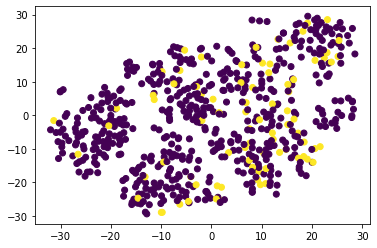

In [28]:
# Plot the reduced features

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [29]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

# Part 3:  Perfrom a Cluster Analysis with K-means

In [31]:
# Determine inertia with for loop

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(11)

,k,inertia
0,1,8986.792439
1,2,7490.872879
2,3,6716.881189
3,4,6281.291536
4,5,5885.853781
5,6,5602.926818
6,7,5391.278247
7,8,5192.650422
8,9,5030.775694
9,10,4889.042806


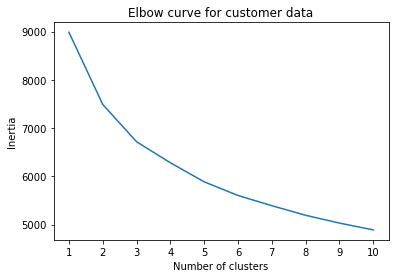

In [32]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

# Part 4:  Recommendation

I am unable to find any clustering of values that would provide meaningful analysis.  The elbow curve does not have any distinct k values that stand out as a good options for clustering as the line shows basically a smooth curve.

If I was forced to try clustering, I would look at 3 and 5 as the best of poor options.